**IF DATASET TYPE IS CSV LIKE THIS:**
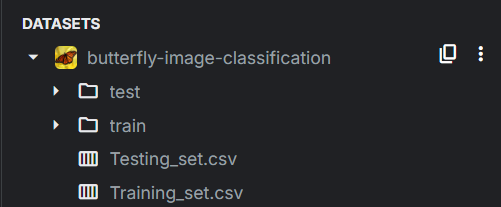


===== Dataset Overview =====
Total samples: 6499
Class distribution:
label
MOURNING CLOAK    131
SLEEPY ORANGE     107
ATALA             100
BROWN SIPROETA     99
SCARCE SWALLOW     97
                 ... 
AMERICAN SNOOT     74
GOLD BANDED        73
MALACHITE          73
CRIMSON PATCH      72
WOOD SATYR         71
Name: count, Length: 75, dtype: int64


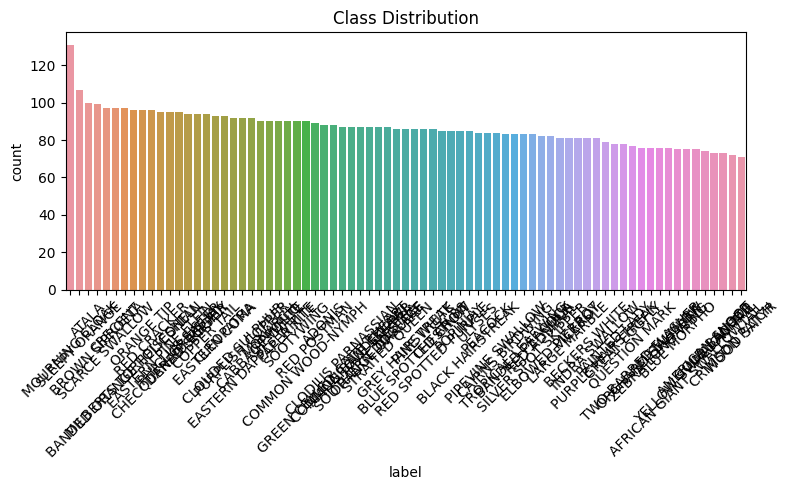


Displaying sample images per class:


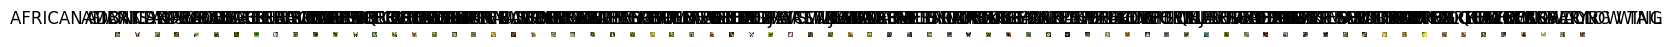

Found 5199 validated image filenames belonging to 75 classes.
Found 1300 validated image filenames belonging to 75 classes.
Found 2786 validated image filenames.


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 75)                  │           9,675 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,401,995 (28.24 MB)

 Trainable params: 7,401,995 (28.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 14s 67ms/step - accuracy: 0.0234 - loss: 4.4045 - val_accuracy: 0.1046 - val_loss: 3.7542
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.1120 - loss: 3.6892 - val_accuracy: 0.2900 - val_loss: 3.0196
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.2751 - loss: 2.8169 - val_accuracy: 0.3946 - val_loss: 2.4242
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.3987 - loss: 2.1880 - val_accuracy: 0.4354 - val_loss: 2.2098
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.4760 - loss: 1.8169 - val_accuracy: 0.4692 - val_loss: 2.0162
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.5626 - loss: 1.4771 - val_accuracy: 0.4792 - val_loss: 2.0055
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - accuracy: 0.6188 - loss: 1.2576 - val_accuracy: 0.4831 - val_loss: 2.0134
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.6580 - loss: 1.1014 - val_

In [30]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ======================= CONFIGURATION =======================

# Choose your format:
dataset_type = "csv"   # or "csv"

# --- Directory-based Dataset ---
# train_dir = "/kaggle/input/intel-image-classification/seg_train/seg_train"
# test_dir = "/kaggle/input/intel-image-classification/seg_test/seg_test"

# --- CSV-based Dataset (if using CSV) ---
# csv_path = "/path/to/your.csv"
# image_root = "/path/to/images"  # Folder containing all images referenced in CSV
csv_path = "/kaggle/input/butterfly-image-classification/Training_set.csv"
test_csv_path = "/kaggle/input/butterfly-image-classification/Testing_set.csv"
image_root = "/kaggle/input/butterfly-image-classification/train"
test_image_root = "/kaggle/input/butterfly-image-classification/test"


img_height, img_width = 128, 128
batch_size = 32
epochs = 10

# ======================= DATA LOADING =======================

if dataset_type == "directory":
    try:
        # Training & Validation from training folder
        train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

        train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(img_height, img_width),
            batch_size=batch_size,
            class_mode='categorical',
            subset='training',
            shuffle=True
        )

        val_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(img_height, img_width),
            batch_size=batch_size,
            class_mode='categorical',
            subset='validation',
            shuffle=True
        )

        # Test generator (optional, only if test_dir exists)
        if os.path.exists(test_dir):
            test_datagen = ImageDataGenerator(rescale=1./255)
            test_generator = test_datagen.flow_from_directory(
                test_dir,
                target_size=(img_height, img_width),
                batch_size=batch_size,
                class_mode='categorical',
                shuffle=False
            )
        else:
            test_generator = None

        num_classes = len(train_generator.class_indices)

    except Exception as e:
        print("Error loading directory-based dataset:", e)
        raise

elif dataset_type == "csv":
    try:
        df = pd.read_csv(csv_path)
        assert "filename" in df.columns or "image_path" in df.columns, "CSV must have 'image' or 'image_path' column"
        image_col = "filename" if "filename" in df.columns else "image_path"
        label_col = "label" if "label" in df.columns else df.columns[1]

        df[image_col] = df[image_col].astype(str)
        df[label_col] = df[label_col].astype(str)

        # ======================= EDA =======================
        print("\n===== Dataset Overview =====")
        print("Total samples:", len(df))
        print("Class distribution:")
        print(df[label_col].value_counts())
        
        # Plotting class distribution
        import seaborn as sns
        plt.figure(figsize=(8,5))
        sns.countplot(data=df, x=label_col, order=df[label_col].value_counts().index)
        plt.title("Class Distribution")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # Display a few sample images
        print("\nDisplaying sample images per class:")
        sample_df = df.groupby(label_col).apply(lambda x: x.sample(1)).reset_index(drop=True)
        
        plt.figure(figsize=(15, 5))
        for idx, row in enumerate(sample_df.itertuples()):
            img_path = os.path.join(image_root, getattr(row, image_col))
            image = plt.imread(img_path)
            plt.subplot(1, len(sample_df), idx+1)
            plt.imshow(image)
            plt.title(getattr(row, label_col))
            plt.axis('off')
        plt.tight_layout()
        plt.show()


        train_df, val_df = train_test_split(df, test_size=0.2, stratify=df[label_col], random_state=42)

        csv_datagen = ImageDataGenerator(rescale=1./255)

        train_generator = csv_datagen.flow_from_dataframe(
            train_df,
            directory=image_root,
            x_col=image_col,
            y_col=label_col,
            target_size=(img_height, img_width),
            batch_size=batch_size,
            class_mode='categorical',
            shuffle=True
        )

        val_generator = csv_datagen.flow_from_dataframe(
            val_df,
            directory=image_root,
            x_col=image_col,
            y_col=label_col,
            target_size=(img_height, img_width),
            batch_size=batch_size,
            class_mode='categorical',
            shuffle=True
        )
        
# if you want to evaluate on the train data
        test_df = pd.read_csv(test_csv_path)
        test_df[image_col] = test_df[image_col].astype(str)

        test_generator = csv_datagen.flow_from_dataframe(
            test_df,
            directory=test_image_root,
            x_col=image_col,
            y_col=None,
            target_size=(img_height, img_width),
            batch_size=batch_size,
            class_mode=None,
            shuffle=False
        )

        num_classes = len(train_generator.class_indices)
        
    except Exception as e:
        print("Error loading CSV-based dataset:", e)
        raise

else:
    raise ValueError("Invalid dataset_type. Must be 'directory' or 'csv'.")

# ======================= MODEL DEFINITION =======================

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# ======================= MODEL TRAINING =======================

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# ======================= MODEL EVALUATION =======================

val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc*100:.2f}%")

# Confusion matrix and classification report on validation
val_generator.reset()
val_preds = model.predict(val_generator)
y_pred_val = np.argmax(val_preds, axis=1)
y_true_val = val_generator.classes

print("\nValidation Classification Report:\n", classification_report(y_true_val, y_pred_val))
print("Validation Confusion Matrix:\n", confusion_matrix(y_true_val, y_pred_val))

# ======================= TEST SET EVALUATION (if test set exists) =======================

if test_generator:
    #test_loss, test_acc = model.evaluate(test_generator)
    predictions = model.predict(test_generator) #as test has no column label
    print(f"\nTest Accuracy: {test_acc*100:.2f}%")

    # Can only be done if test data has labels
    
    # test_generator.reset()
    # test_preds = model.predict(test_generator)
    # y_pred_test = np.argmax(test_preds, axis=1)
    # y_true_test = test_generator.classes

    # print("\nTest Classification Report:\n", classification_report(y_true_test, y_pred_test))
    # print("Test Confusion Matrix:\n", confusion_matrix(y_true_test, y_pred_test))


**IF DATASET IS DIRECTORY**
**LIKE THIS:**
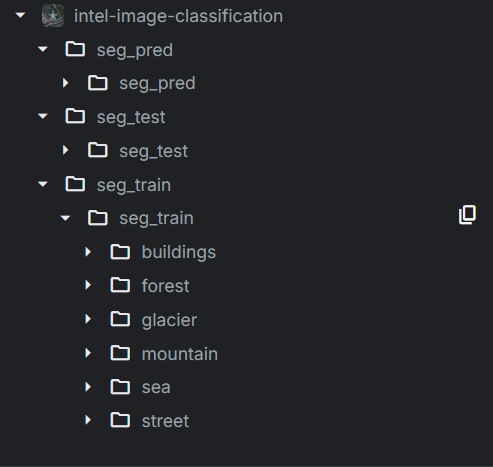

Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.

Class Labels:
buildings: 0
forest: 1
glacier: 2
mountain: 3
sea: 4
street: 5

Number of samples in each class (Train):
buildings: 1753
forest: 1817
glacier: 1924
mountain: 2010
sea: 1820
street: 1906


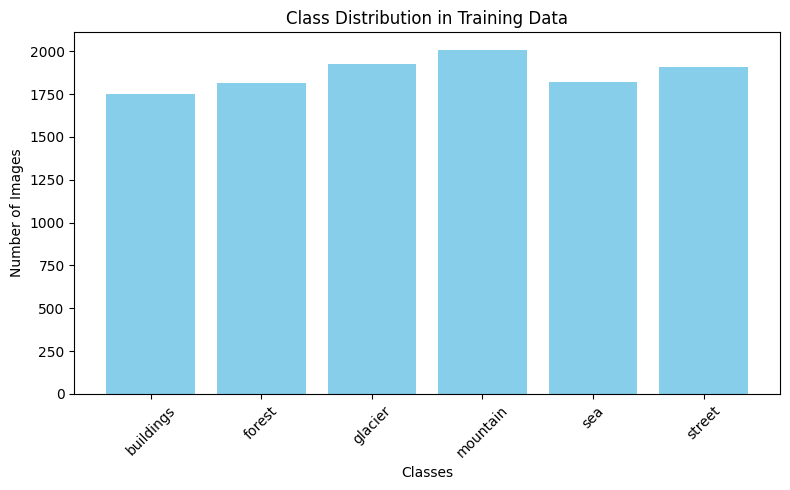

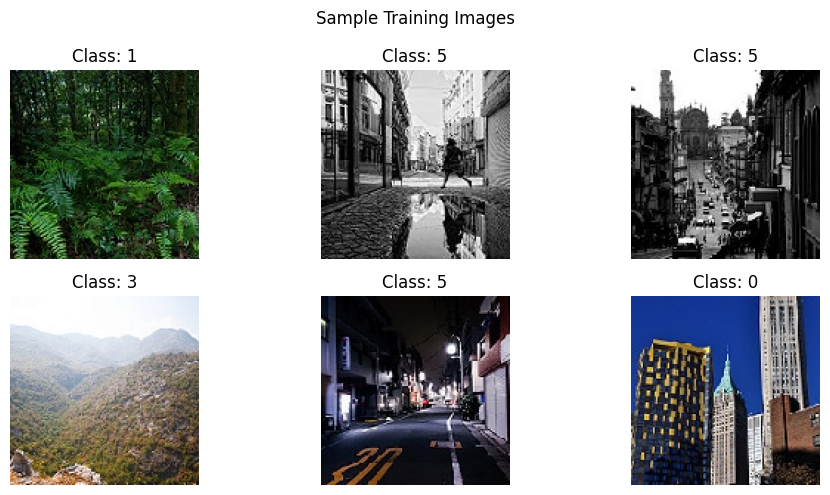

Found 3000 images belonging to 6 classes.


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,393,094 (28.20 MB)

 Trainable params: 7,393,094 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 22s 54ms/step - accuracy: 0.4695 - loss: 1.5686 - val_accuracy: 0.6690 - val_loss: 0.8731
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.6742 - loss: 0.8717 - val_accuracy: 0.7293 - val_loss: 0.7757
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - accuracy: 0.7564 - loss: 0.6630 - val_accuracy: 0.7718 - val_loss: 0.6383
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.8069 - loss: 0.5227 - val_accuracy: 0.7743 - val_loss: 0.6706
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.8552 - loss: 0.4095 - val_accuracy: 0.7807 - val_loss: 0.6552
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.8852 - loss: 0.3190 - val_accuracy: 0.7846 - val_loss: 0.6946
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.9085 - loss: 0.2589 - val_accuracy: 0.7596 - val_loss: 0.8254
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 19s 52ms/step - accuracy: 0.9218 - loss: 0.2238 - 

In [32]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ======================= CONFIGURATION =======================

# Choose your format:
dataset_type = "directory"   # or "csv"

# --- Directory-based Dataset ---
train_dir = "/kaggle/input/intel-image-classification/seg_train/seg_train"
test_dir = "/kaggle/input/intel-image-classification/seg_test/seg_test"

# --- CSV-based Dataset (if using CSV) ---
# csv_path = "/path/to/your.csv"
# image_root = "/path/to/images"  # Folder containing all images referenced in CSV


img_height, img_width = 128, 128
batch_size = 32
epochs = 10

# ======================= DATA LOADING =======================

if dataset_type == "directory":
    try:
        # Training & Validation from training folder
        train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

        train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(img_height, img_width),
            batch_size=batch_size,
            class_mode='categorical',
            subset='training',
            shuffle=True
        )

        val_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(img_height, img_width),
            batch_size=batch_size,
            class_mode='categorical',
            subset='validation',
            shuffle=True
        )

        # ============ EDA ============

        print("\nClass Labels:")
        for class_name, index in train_generator.class_indices.items():
            print(f"{class_name}: {index}")

        print("\nNumber of samples in each class (Train):")
        labels, counts = np.unique(train_generator.classes, return_counts=True)
        for label, count in zip(labels, counts):
            class_name = list(train_generator.class_indices.keys())[list(train_generator.class_indices.values()).index(label)]
            print(f"{class_name}: {count}")

        # Plot distribution
        plt.figure(figsize=(8, 5))
        plt.bar([list(train_generator.class_indices.keys())[i] for i in labels], counts, color='skyblue')
        plt.title("Class Distribution in Training Data")
        plt.xlabel("Classes")
        plt.ylabel("Number of Images")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Show a few sample images
        x_batch, y_batch = next(train_generator)
        plt.figure(figsize=(10, 5))
        for i in range(6):
            plt.subplot(2, 3, i + 1)
            plt.imshow(x_batch[i])
            plt.title(f"Class: {np.argmax(y_batch[i])}")
            plt.axis("off")
        plt.suptitle("Sample Training Images")
        plt.tight_layout()
        plt.show()
        
        # Test generator (optional, only if test_dir exists)
        if os.path.exists(test_dir):
            test_datagen = ImageDataGenerator(rescale=1./255)
            test_generator = test_datagen.flow_from_directory(
                test_dir,
                target_size=(img_height, img_width),
                batch_size=batch_size,
                class_mode='categorical',
                shuffle=False
            )
        else:
            test_generator = None

        num_classes = len(train_generator.class_indices)

    except Exception as e:
        print("Error loading directory-based dataset:", e)
        raise


elif dataset_type == "csv":
    try:
        df = pd.read_csv(csv_path)
        assert "filename" in df.columns or "image_path" in df.columns, "CSV must have 'image' or 'image_path' column"
        image_col = "filename" if "filename" in df.columns else "image_path"
        label_col = "label" if "label" in df.columns else df.columns[1]

        df[image_col] = df[image_col].astype(str)
        df[label_col] = df[label_col].astype(str)

        train_df, val_df = train_test_split(df, test_size=0.2, stratify=df[label_col], random_state=42)

        csv_datagen = ImageDataGenerator(rescale=1./255)

        train_generator = csv_datagen.flow_from_dataframe(
            train_df,
            directory=image_root,
            x_col=image_col,
            y_col=label_col,
            target_size=(img_height, img_width),
            batch_size=batch_size,
            class_mode='categorical',
            shuffle=True
        )

        val_generator = csv_datagen.flow_from_dataframe(
            val_df,
            directory=image_root,
            x_col=image_col,
            y_col=label_col,
            target_size=(img_height, img_width),
            batch_size=batch_size,
            class_mode='categorical',
            shuffle=True
        )
        
# if you want to evaluate on the train data
        test_df = pd.read_csv(test_csv_path)
        test_df[image_col] = test_df[image_col].astype(str)

        test_generator = csv_datagen.flow_from_dataframe(
            test_df,
            directory=test_image_root,
            x_col=image_col,
            y_col=None,
            target_size=(img_height, img_width),
            batch_size=batch_size,
            class_mode=None,
            shuffle=False
        )

        num_classes = len(train_generator.class_indices)
        
    except Exception as e:
        print("Error loading CSV-based dataset:", e)
        raise

else:
    raise ValueError("Invalid dataset_type. Must be 'directory' or 'csv'.")

# ======================= MODEL DEFINITION =======================

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# ======================= MODEL TRAINING =======================

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# ======================= MODEL EVALUATION =======================

val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc*100:.2f}%")

# Confusion matrix and classification report on validation
val_generator.reset()
val_preds = model.predict(val_generator)
y_pred_val = np.argmax(val_preds, axis=1)
y_true_val = val_generator.classes

print("\nValidation Classification Report:\n", classification_report(y_true_val, y_pred_val))
print("Validation Confusion Matrix:\n", confusion_matrix(y_true_val, y_pred_val))

# ======================= TEST SET EVALUATION (if test set exists) =======================

if test_generator:
    test_loss, test_acc = model.evaluate(test_generator)
    # predictions = model.predict(test_generator) #as test has no column label
    print(f"\nTest Accuracy: {test_acc*100:.2f}%")

    # Can only be done if test data has labels
    
    test_generator.reset()
    test_preds = model.predict(test_generator)
    y_pred_test = np.argmax(test_preds, axis=1)
    y_true_test = test_generator.classes

    print("\nTest Classification Report:\n", classification_report(y_true_test, y_pred_test))
    print("Test Confusion Matrix:\n", confusion_matrix(y_true_test, y_pred_test))
